In [7]:
%load_ext autoreload
%autoreload 2

import sys
import os
import typing as tp
import math
from importlib import reload

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union, Tuple, List
from mars import spin_model, spectra_manager, mesher, constants

from sample_creators import (create_2_electrons_sample, create_3_electrons_sample, 
                             create_4_electrons_sample, create_2_electrons_1_nuclei_sample,
                             create_1_high_spin_electron_1_nuclei_sample\
                            )

from saving_benchmarks import save_benchmark_results, load_benchmark_results

from bencmarking import benchmark_several_configurations, compare_benchmarks, plot_benchmark_comparison

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np

Benchmarking on CPU with torch.float32

Two electrons (Hilbert dim: 4)
  Mesh 20x21        ...   25.50 ±  1.21 ms (192 orientations)
  Mesh 20x30        ...   29.94 ±  0.65 ms (192 orientations)
  Mesh 20x40        ...   40.52 ±  1.72 ms (192 orientations)

Three electrons (Hilbert dim: 8)
  Mesh 20x21        ...   51.01 ±  1.16 ms (192 orientations)
  Mesh 20x30        ...   71.64 ±  1.74 ms (192 orientations)
  Mesh 20x40        ...  114.92 ±  4.38 ms (192 orientations)

Two electrons + one nucleus (Hilbert dim: 12)
  Mesh 20x21        ...   89.95 ±  2.13 ms (192 orientations)
  Mesh 20x30        ...  155.41 ±  2.09 ms (192 orientations)
  Mesh 20x40        ...  259.18 ±  5.34 ms (192 orientations)


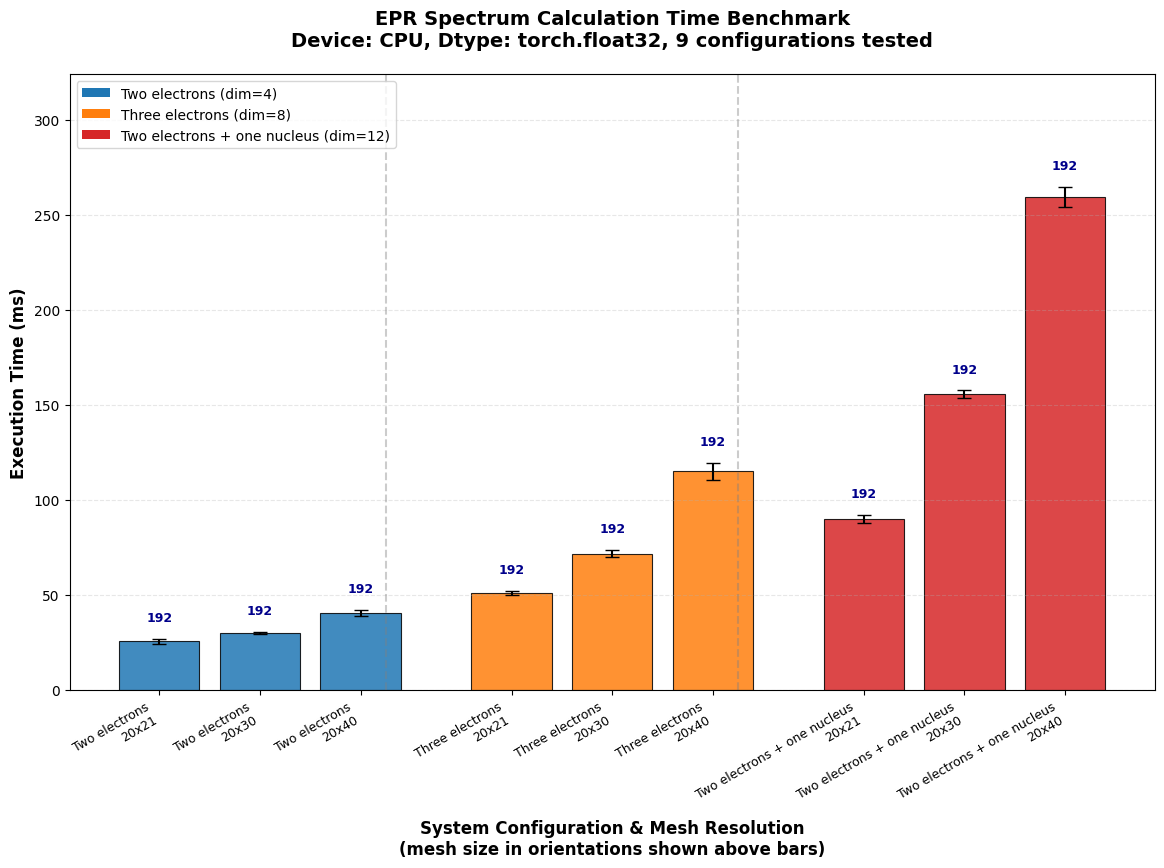

In [9]:
config_creators = {
    "2e": ("Two electrons", create_2_electrons_sample),
    "3e": ("Three electrons", create_3_electrons_sample),
    "2e_1n": ("Two electrons + one nucleus", create_2_electrons_1_nuclei_sample),
}

mesh_configs = [(20, 21), (20, 30), (20, 40)]
#mesh_configs = [(20, 20)]
#mesh_configs = [(4, 5),]
results_analytical_formula = benchmark_several_configurations(config_creators=config_creators, mesh_configs=mesh_configs,
                                                                 dtype=torch.float32, device = torch.device("cpu"))

In [10]:
results_initial = load_benchmark_results("time_test_results/run_20260205_interpolation_before_changes")

✓ Loaded benchmark from run_20260205_interpolation_before_changes
  Timestamp: 2026-02-05T16:28:16.092118
  Mars vunknown | PyTorch v2.5.0+cpu
  Configurations: 9


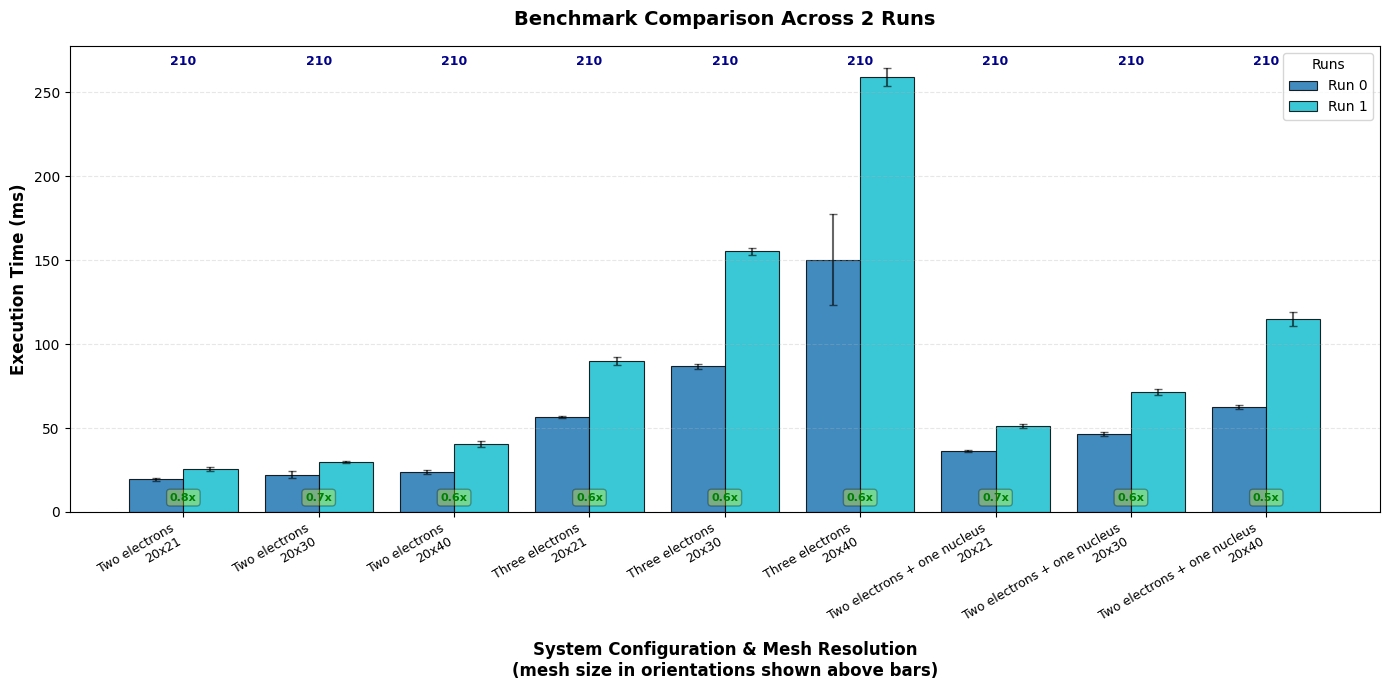

{'summary':                                                   mean_time_ms_mean   
 system_key mesh_resolution hilbert_dim mesh_size                      
 2e         20x21           4           192                    25.50  \
                                        210                    19.52   
            20x30           4           192                    29.94   
                                        210                    22.26   
            20x40           4           192                    40.52   
                                        210                    23.91   
 2e_1n      20x21           12          192                    89.95   
                                        210                    56.61   
            20x30           12          192                   155.41   
                                        210                    86.82   
            20x40           12          192                   259.18   
                                        210          

In [11]:
compare_benchmarks([results_initial["results"], results_analytical_formula])

In [69]:
config_creators = {
    "2e": ("Two electrons", create_2_electrons_sample),
    "3e": ("Three electrons", create_3_electrons_sample),
    "4e": ("Four electrons", create_4_electrons_sample),
    "2e_1n": ("Two electrons + one nucleus", create_2_electrons_1_nuclei_sample),
    "high_spin": ("High-spin Mn(II)", create_1_high_spin_electron_1_nuclei_sample),
}

In [7]:
import torch
import timeit

# Setup: create a large tensor on CPU (you can move to CUDA if available)
device = 'cpu'  # or 'cuda' if you want GPU timing
x = torch.randn(10_000_000, device=device)

# Define callables
def run_erf():
    return torch.erf(x)

def run_exp():
    return torch.exp(x)

# Time each function (number of repeats can be adjusted)
n_runs = 1000

time_erf = timeit.timeit(run_erf, number=n_runs)
time_exp = timeit.timeit(run_exp, number=n_runs)

print(f"torch.erf: {time_erf:.4f} s over {n_runs} runs")
print(f"torch.exp: {time_exp:.4f} s over {n_runs} runs")
print(f"Ratio (erf/exp): {time_erf / time_exp:.2f}")

torch.erf: 5.4448 s over 1000 runs
torch.exp: 4.6081 s over 1000 runs
Ratio (erf/exp): 1.18
